In [36]:
from visual_behavior import database as db
import visual_behavior.utilities as vbu

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [42]:
%matplotlib notebook

In [4]:
summary = db.get_behavior_session_summary()

In [5]:
summary.head()

,_id,mouse_id,behavior_session_uuid,startdatetime,session_duration,d_prime_peak,discrim_p,response_bias,earned_water,total_water,num_contingent_trials,lick_latency_median,fraction_time_aborted,fraction_time_hit,fraction_time_miss,fraction_time_correct_reject,fraction_time_false_alarm,fraction_time_auto_rewarded,number_of_hit_trials,number_of_miss_trials,number_of_false_alarm_trials,number_of_correct_reject_trials,hit_rate,false_alarm_rate,hit_rate_peak,false_alarm_rate_peak,number_of_licks,blank_duration,day_of_week,change_time_distribution,user_id,rig_id,stimulus,stage,lims_id,pkl_path,behavior_session_id,foraging_id,ophys_experiment_id,ophys_session_id,error_on_load,flashwise_lick_probability,d_prime
0,5d5e26463097291860838559,459521,9bc45643-cfba-4095-82cf-b0093c496bfd,2019-08-21 22:13:44.362,3615.181455,3.293702,7.385923e-27,0.884211,1.141,1.141,190.0,0.400331,0.543322,0.395201,0.006233,0.044032,0.011212,0.000000,163.0,3.0,5.0,19.0,0.981928,0.208333,1.000000,0.333333,4695.0,0.5,2.0,geometric,samg,NP3,images,TRAINING_4_images_A_handoff_ready,928895007.0,/allen/programs/braintv/production/visualbehav...,928895007.0,9bc45643-cfba-4095-82cf-b0093c496bfd,NaN,NaN,NaN,NaN,NaN
1,5d5e32a6d055938fd1f50b99,363140,10822224-3a22-4d90-b4f1-3be89e17a1a7,2018-06-14 16:25:07.815,3594.743224,2.396817,3.484705e-02,0.226708,0.592,0.667,322.0,0.767306,0.196339,0.167138,0.510146,0.083432,0.007164,0.035781,70.0,214.0,3.0,35.0,0.246479,0.078947,0.528090,0.166667,2668.0,0.5,3.0,exponential,kylam,D4,images,ready_for_imaging,709663827.0,/allen/programs/braintv/production/neuralcodin...,709663827.0,10822224-3a22-4d90-b4f1-3be89e17a1a7,NaN,NaN,NaN,NaN,NaN
2,5d5e3333d055938fd1f50e53,481351,fb0cabf4-03e5-4c05-841d-205166148290,2019-08-21 21:17:47.057,3622.225067,2.815124,8.860034e-08,0.671795,1.240,1.280,195.0,0.316865,0.538259,0.276128,0.099712,0.053900,0.014587,0.017414,124.0,41.0,7.0,23.0,0.751515,0.233333,1.000000,0.666667,3983.0,0.5,2.0,exponential,jackies,F3,grating,TRAINING_1_gratings,928821515.0,/allen/programs/braintv/production/visualbehav...,928821515.0,fb0cabf4-03e5-4c05-841d-205166148290,NaN,NaN,NaN,NaN,NaN
3,5d5e333ed055938fd1f51339,464204,5f2c1cdb-d663-432b-b608-136cd2785b08,2019-08-21 20:51:10.619,3601.011729,0.000000,1.000000e+00,0.000000,0.000,0.000,407.0,NaN,0.000834,0.000000,0.875974,0.123192,0.000000,0.000000,0.0,357.0,0.0,50.0,0.000000,0.000000,0.000000,0.000000,1.0,0.5,2.0,geometric,xana.waughman,2P5,images,OPHYS_5_images_A_passive,928809619.0,/allen/programs/braintv/production/visualbehav...,928809619.0,5f2c1cdb-d663-432b-b608-136cd2785b08,929136322.0,928146339.0,NaN,NaN,NaN
4,5d5e3348d055938fd1f514dd,461027,48a39806-5c34-445d-91db-6fcb73de5bdd,2019-08-21 21:04:46.599,3617.875697,2.983456,5.038473e-11,0.583630,1.141,1.141,281.0,0.550454,0.299384,0.404879,0.211688,0.079899,0.004150,0.000000,162.0,84.0,2.0,33.0,0.658537,0.057143,0.744444,0.285714,5371.0,0.5,2.0,geometric,samg,NP3,images,TRAINING_4_images_A_handoff_ready,928800826.0,/allen/programs/braintv/production/visualbehav...,928800826.0,48a39806-5c34-445d-91db-6fcb73de5bdd,NaN,NaN,NaN,NaN,NaN


In [29]:
def get_behavior_video_path(row):
    if pd.notnull(row['ophys_session_id']):
        row = db.get_well_known_files(int(row['ophys_session_id'])).set_index('name').loc['RawBehaviorTrackingVideo']
        return os.path.join(row['storage_directory'],row['filename'])
    else:
        return None

In [54]:
ophys_session_id = 877907546
mouse_id = summary.query('ophys_session_id == @ophys_session_id')['mouse_id'].iloc[0]
all_sessions = summary.query("mouse_id == @mouse_id").copy()
all_sessions['behavior_video_path'] = all_sessions.apply(get_behavior_video_path, axis=1)
all_sessions.sort_values(by='startdatetime')[['rig_id','stage','startdatetime','ophys_session_id','behavior_session_uuid','number_of_licks','earned_water','behavior_video_path']]

[autoreload of pandas failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/__init__.py", line 54, in <module>
    from pandas.core.api import (
Import

[autoreload of pandas.core.tools.datetimes failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 392, in superreload
    update_generic(old_obj, new_obj)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 329, in update_generic
    update(a, b)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 265, in update_function
    setattr(old, name, getattr(new, name))
ValueError: to_datetime() requires a code object with 5 free vars, not 0
]
[autoreload of pandas.core.arrays.integer failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_object

[autoreload of pandas.core.indexes.interval failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/core/indexes/interval.py", line 44, in <module>
    f

[autoreload of pandas.plotting._misc failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 392, in superreload
    update_generic(old_obj, new_obj)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 329, in update_generic
    update(a, b)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 265, in update_function
    setattr(old, name, getattr(new, name))
ValueError: andrews_curves() requires a code object with 5 free vars, not 0
]
[autoreload of pandas.core.groupby.groupby failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)

[autoreload of pandas.io.excel._base failed: Traceback (most recent call last):
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/dougo/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/dougo/.conda/envs/visual_behavior/lib/python3.7/site-packages/pandas/io/excel/_base.py", line 9, in <module>
    from pandas._lib

TypeError: descriptor 'axes' for 'BlockManager' objects doesn't apply to 'BlockManager' object

In [53]:
mouse_id

'448900'

<IPython.core.display.Javascript object>


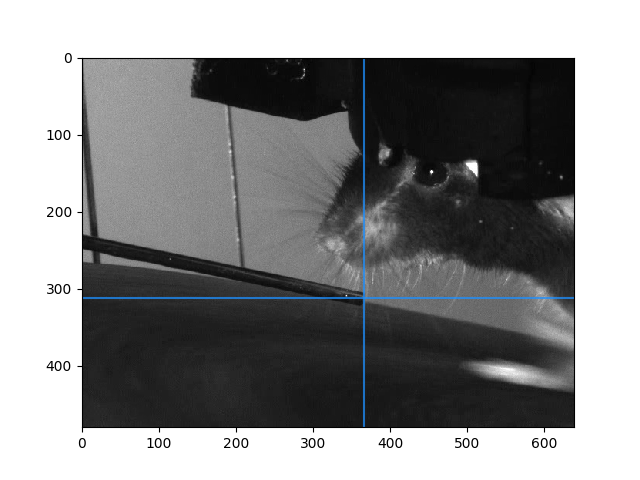

In [51]:
fig,ax=plt.subplots()
row = all_sessions.loc[6901]
movie = vbu.Movie(row['behavior_video_path'])
ax.imshow(movie.get_frame(1000))
ax.axvline(366,color='dodgerblue',alpha=0.75)
ax.axhline(312,color='dodgerblue',alpha=0.75)

<IPython.core.display.Javascript object>


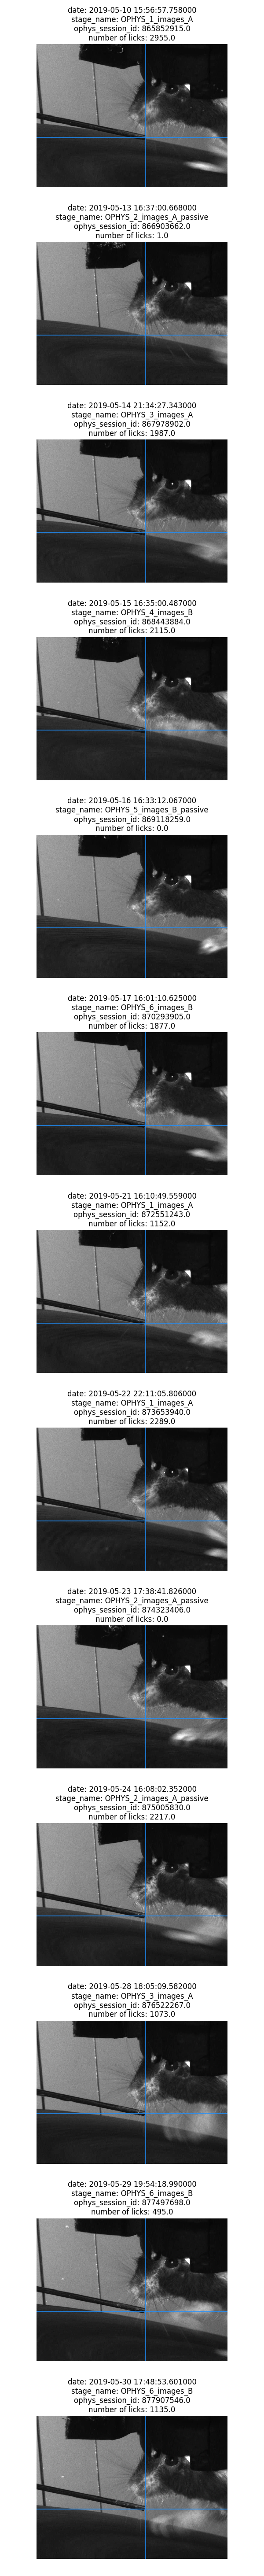

In [52]:
fig,ax=plt.subplots(
    len(all_sessions[pd.notnull(all_sessions['ophys_session_id'])]),
    1,
    figsize = (
        6,
        len(all_sessions[pd.notnull(all_sessions['ophys_session_id'])])*4.5
    )
)

for idx,row in all_sessions[pd.notnull(all_sessions['ophys_session_id'])].sort_values(by='startdatetime').reset_index().iterrows():
    movie = vbu.Movie(row['behavior_video_path'])
    ax[idx].imshow(movie.get_frame(1000))
    ax[idx].set_title('date: {}\nstage_name: {}\nophys_session_id: {}\nnumber of licks: {}'.format(row['startdatetime'],row['stage'],row['ophys_session_id'], row['number_of_licks']))
    ax[idx].axis('off')
    ax[idx].axvline(366,color='dodgerblue',alpha=0.75)
    ax[idx].axhline(312,color='dodgerblue',alpha=0.75)
fig.tight_layout()